In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [191]:
data = pd.read_csv("91_mobiles_uncleaned.csv")
data.head()

,Mobile,Spec_Score,Operating_System,Price,Per_Dis_Cam_Bat,Other_Features
0,OnePlus Nord CE 4 5G,86%,Android v14,"Rs.24,998",Performance\n \n\n\n\n\n\n\n\...,128 GB + 1 TB ExpandableDual SIM: Nano + Nano ...
1,realme GT 6T,88%,Android v14,"Rs.30,999",Performance\n \n\n\n\n\n\n\n\...,"128 GB, Non ExpandableDual SIM: Nano + NanoSup..."
2,Samsung Galaxy F55 5G,89%,Android v14,"Rs.26,999",Performance\n \n\n\n\n\n\n\n\...,128 GB + 1 TB ExpandableDual SIM: Nano + Nano ...
3,Infinix GT 20 Pro 5G,89%,Android v14,"Rs.24,999",Performance\n \n\n\n\n\n\n\n\...,"256 GB, Non ExpandableDual SIM: Nano + NanoSup..."
4,vivo V30e,86%,Android v14,"Rs.27,999",Performance\n \n\n\n\n\n\n\n\...,128 GB + 1 TB ExpandableDual SIM: Nano + Nano ...


In [192]:
data['Spec_Score'].mode()[0]

'68%'

In [193]:
data['Spec_Score'] = data['Spec_Score'].fillna(data['Spec_Score'].mode()[0])


In [194]:
data['Spec_Score'].isnull().sum()

0

In [195]:
data['Spec_Score'] = data['Spec_Score'].replace(r'%', '', regex=True).astype(int)

In [196]:
# Extract the numeric portion using split
data['Price'] = data['Price'].str.split('.').str[1]

In [197]:
data['Price'].isnull().sum()

0

In [198]:
# Remove commas and convert to integer
data['Price'] = data['Price'].str.replace(',', '', regex=True)

In [199]:
data['Price'] = data['Price'].replace('N/A', np.nan)

In [200]:
data['Price']=data['Price'].astype(float)

In [201]:
data['Price'] = data['Price'].fillna(data['Price'].mean())

In [202]:
data['Price'].isnull().sum()

0

In [203]:
data['Price'].astype(int)

0        24998
1        30999
2        26999
3        24999
4        27999
         ...  
13137     4599
13138     1899
13139     2899
13140    13318
13141     2899
Name: Price, Length: 13142, dtype: int32

In [204]:
data["Per_Dis_Cam_Bat"] = data["Per_Dis_Cam_Bat"].astype(str)

In [205]:
import re

In [206]:
def extract_features(text):

    cpu_cores = re.search(r"(Dual Core|Quad Core|Hexa Core|Octa Core)", text)
    cpu_speed = re.search(r"(\d+\.?\d*) GHz", text)
    ram = re.search(r"(\d+) GB RAM", text)
    display_size = re.search(r"(\d+\.\d+) inches", text)
    camera_numbers = re.search(r"(Primary Camera|Dual Primary Cameras|Triple Primary Cameras|Quad Primary Cameras)", text)
    front_camera = re.search(r"(\d+) MP Front Camera", text)
    battery = re.search(r"(\d+) mAh", text)

    cpu_cores = str(cpu_cores.group(1)) if cpu_cores else np.nan
    cpu_speed = float(cpu_speed.group(1)) if cpu_speed else np.nan
    ram = int(ram.group(1)) if ram else np.nan
    display_size = float(display_size.group(1)) if display_size else np.nan
    camera_type = camera_numbers.group(1) if camera_numbers else np.nan
    front_camera = int(front_camera.group(1)) if front_camera else np.nan
    battery = int(battery.group(1)) if battery else np.nan

    features = {
        "CPU Cores": cpu_cores,
        "CPU Speed (GHz)": cpu_speed,
        "RAM (GB)": ram,
        "Display Size (inches)": display_size,
        "Camera Type": camera_type,
        "Front Camera (MP)": front_camera,
        "Battery (mAh)": battery,

    }

    return features

extracted_data = [extract_features(text) for text in data["Per_Dis_Cam_Bat"]]
df = pd.DataFrame(extracted_data)

In [207]:
data = pd.concat([data, df], axis=1, ignore_index=False)

In [208]:
data

,Mobile,Spec_Score,Operating_System,Price,Per_Dis_Cam_Bat,Other_Features,CPU Cores,CPU Speed (GHz),RAM (GB),Display Size (inches),Camera Type,Front Camera (MP),Battery (mAh)
0,OnePlus Nord CE 4 5G,86,Android v14,24998.000000,Performance\n \n\n\n\n\n\n\n\...,128 GB + 1 TB ExpandableDual SIM: Nano + Nano ...,NaN,2.63,38.0,6.70,Dual Primary Cameras,16.0,5500.0
1,realme GT 6T,88,Android v14,30999.000000,Performance\n \n\n\n\n\n\n\n\...,"128 GB, Non ExpandableDual SIM: Nano + NanoSup...",NaN,2.80,38.0,6.78,Dual Primary Cameras,32.0,5500.0
2,Samsung Galaxy F55 5G,89,Android v14,26999.000000,Performance\n \n\n\n\n\n\n\n\...,128 GB + 1 TB ExpandableDual SIM: Nano + Nano ...,NaN,2.40,18.0,6.70,Triple Primary Cameras,50.0,5000.0
3,Infinix GT 20 Pro 5G,89,Android v14,24999.000000,Performance\n \n\n\n\n\n\n\n\...,"256 GB, Non ExpandableDual SIM: Nano + NanoSup...",NaN,3.10,8.0,6.78,Triple Primary Cameras,32.0,5000.0
4,vivo V30e,86,Android v14,27999.000000,Performance\n \n\n\n\n\n\n\n\...,128 GB + 1 TB ExpandableDual SIM: Nano + Nano ...,Quad Core,2.20,18.0,6.78,Dual Primary Cameras,50.0,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13137,Virgin vJazz,68,NaN,4599.000000,Display2 inches (5.08 cm)141 PPICamera1.3 MP P...,6 MB + 2 GB ExpandableNot Supported in IndiaFM...,NaN,NaN,NaN,NaN,Primary Camera,NaN,1050.0
13138,Karbonn K451,68,NaN,1899.000000,"Display2 inches (5.08 cm)141 PPI, LCDCamera0.1...",Not Supported in IndiaFM Radio,NaN,NaN,NaN,NaN,Primary Camera,NaN,1100.0
13139,Samsung Super Star SCH-S189,68,NaN,2899.000000,Display1.5 inches (3.81 cm)121 PPIBattery800 mAh,Not Supported in IndiaNo Wi-fi,NaN,NaN,NaN,1.50,NaN,NaN,800.0
13140,Nokia N73 MusicEdition,68,NaN,13318.953857,"Display, LCDCamera3.2 MP Primary Camera","40 MB, Non ExpandableNot Supported in IndiaFM ...",NaN,NaN,NaN,NaN,Primary Camera,NaN,NaN


In [209]:
data.drop(columns=['Per_Dis_Cam_Bat'], inplace=True)

In [210]:
data.value_counts()

Mobile                        Spec_Score  Operating_System              Price     Other_Features                                                                                                                      CPU Cores  CPU Speed (GHz)  RAM (GB)  Display Size (inches)  Camera Type           Front Camera (MP)  Battery (mAh)
Alcatel Flash Plus 2 32GB     68          Android v6.0.1 (Marshmallow)  12690.0   32 GB + 128 GB ExpandableDual SIM: Micro + NanoNot Supported in IndiaSupported in IndiaFingerprint sensor                           Quad Core  1.80             67553.0   5.50                   Primary Camera        5.0                3000.0           3
TCL 950                       73          Android v6.0 (Marshmallow)    32990.0   64 GB + 128 GB ExpandableDual SIM: Nano + Nano (Hybrid)Not Supported in IndiaVoLTESupported in IndiaFingerprint sensor              Dual Core  2.15             8204.0    5.50                   Primary Camera        8.0                3000.0           3


In [ ]:
def extract_features2(text):
    storage_internal = re.search(r"(\d+ GB|\d+ TB)(?=\s*,?\s*(Expandable|Non Expandable))", text)
    expandable_storage = re.search(r"(\d+ GB|\d+ TB) Expandable", text)
    india_support = re.search(r"(Not Supported in India|Supported in India)", text)
    volte_support = re.search(r"VoLTE", text)
    fingerprint_sensor = re.search(r"Fingerprint sensor", text)
    usb_otg_support = re.search(r"USB OTG Support", text)
    fm_radio = re.search(r"FM Radio", text)

    storage_internal = storage_internal.group(1) if storage_internal else np.nan
    expandable_storage = expandable_storage.group(1) if expandable_storage else np.nan
    india_support = india_support.group(1) if india_support else np.nan
    volte_support = "Yes" if volte_support else "No"
    fingerprint_sensor = "Yes" if fingerprint_sensor else "No"
    usb_otg_support = "Yes" if usb_otg_support else "No"
    fm_radio = "Yes" if fm_radio else "No"
    features = {
        "Internal Storage": storage_internal,
        "Expandable Storage": expandable_storage,
        "India Support": india_support,
        "VoLTE Support": volte_support,
        "Fingerprint Sensor": fingerprint_sensor,
        "USB OTG Support": usb_otg_support,
        "FM Radio": fm_radio
    }

    return features

extracted_data = [extract_features2(text) for text in data["Other_Features"]]

extracted_data = pd.DataFrame(extracted_data)
extracted_data

,Internal Storage,Expandable Storage,India Support,VoLTE Support,Fingerprint Sensor,USB OTG Support,FM Radio
0,1 TB,1 TB,Supported in India,Yes,Yes,Yes,No
1,128 GB,NaN,Supported in India,Yes,Yes,Yes,No
2,1 TB,1 TB,Supported in India,Yes,Yes,Yes,Yes
3,256 GB,NaN,Supported in India,Yes,Yes,Yes,No
4,1 TB,1 TB,Supported in India,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...
13137,2 GB,2 GB,Not Supported in India,No,No,No,Yes
13138,NaN,NaN,Not Supported in India,No,No,No,Yes
13139,NaN,NaN,Not Supported in India,No,No,No,No
13140,NaN,NaN,Not Supported in India,No,No,No,Yes


In [212]:
for col in extracted_data.columns:
    print(col , extracted_data[col].isnull().sum())

Internal Storage 3171
Expandable Storage 4674
India Support 0
VoLTE Support 0
Fingerprint Sensor 0
USB OTG Support 0
FM Radio 0


In [213]:
data = pd.concat([data, extracted_data], axis=1, ignore_index=False)

In [214]:
data.drop(columns=['Other_Features'], inplace=True)

In [215]:
data

,Mobile,Spec_Score,Operating_System,Price,CPU Cores,CPU Speed (GHz),RAM (GB),Display Size (inches),Camera Type,Front Camera (MP),Battery (mAh),Internal Storage,Expandable Storage,India Support,VoLTE Support,Fingerprint Sensor,USB OTG Support,FM Radio
0,OnePlus Nord CE 4 5G,86,Android v14,24998.000000,NaN,2.63,38.0,6.70,Dual Primary Cameras,16.0,5500.0,1 TB,1 TB,Supported in India,Yes,Yes,Yes,No
1,realme GT 6T,88,Android v14,30999.000000,NaN,2.80,38.0,6.78,Dual Primary Cameras,32.0,5500.0,128 GB,NaN,Supported in India,Yes,Yes,Yes,No
2,Samsung Galaxy F55 5G,89,Android v14,26999.000000,NaN,2.40,18.0,6.70,Triple Primary Cameras,50.0,5000.0,1 TB,1 TB,Supported in India,Yes,Yes,Yes,Yes
3,Infinix GT 20 Pro 5G,89,Android v14,24999.000000,NaN,3.10,8.0,6.78,Triple Primary Cameras,32.0,5000.0,256 GB,NaN,Supported in India,Yes,Yes,Yes,No
4,vivo V30e,86,Android v14,27999.000000,Quad Core,2.20,18.0,6.78,Dual Primary Cameras,50.0,5500.0,1 TB,1 TB,Supported in India,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13137,Virgin vJazz,68,NaN,4599.000000,NaN,NaN,NaN,NaN,Primary Camera,NaN,1050.0,2 GB,2 GB,Not Supported in India,No,No,No,Yes
13138,Karbonn K451,68,NaN,1899.000000,NaN,NaN,NaN,NaN,Primary Camera,NaN,1100.0,NaN,NaN,Not Supported in India,No,No,No,Yes
13139,Samsung Super Star SCH-S189,68,NaN,2899.000000,NaN,NaN,NaN,1.50,NaN,NaN,800.0,NaN,NaN,Not Supported in India,No,No,No,No
13140,Nokia N73 MusicEdition,68,NaN,13318.953857,NaN,NaN,NaN,NaN,Primary Camera,NaN,NaN,NaN,NaN,Not Supported in India,No,No,No,Yes


In [216]:
data.duplicated().sum()

175

In [217]:
data.drop_duplicates(inplace=True)

In [218]:
data

,Mobile,Spec_Score,Operating_System,Price,CPU Cores,CPU Speed (GHz),RAM (GB),Display Size (inches),Camera Type,Front Camera (MP),Battery (mAh),Internal Storage,Expandable Storage,India Support,VoLTE Support,Fingerprint Sensor,USB OTG Support,FM Radio
0,OnePlus Nord CE 4 5G,86,Android v14,24998.000000,NaN,2.63,38.0,6.70,Dual Primary Cameras,16.0,5500.0,1 TB,1 TB,Supported in India,Yes,Yes,Yes,No
1,realme GT 6T,88,Android v14,30999.000000,NaN,2.80,38.0,6.78,Dual Primary Cameras,32.0,5500.0,128 GB,NaN,Supported in India,Yes,Yes,Yes,No
2,Samsung Galaxy F55 5G,89,Android v14,26999.000000,NaN,2.40,18.0,6.70,Triple Primary Cameras,50.0,5000.0,1 TB,1 TB,Supported in India,Yes,Yes,Yes,Yes
3,Infinix GT 20 Pro 5G,89,Android v14,24999.000000,NaN,3.10,8.0,6.78,Triple Primary Cameras,32.0,5000.0,256 GB,NaN,Supported in India,Yes,Yes,Yes,No
4,vivo V30e,86,Android v14,27999.000000,Quad Core,2.20,18.0,6.78,Dual Primary Cameras,50.0,5500.0,1 TB,1 TB,Supported in India,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13136,Samsung S5620 Monte,68,NaN,10200.000000,NaN,NaN,NaN,NaN,Primary Camera,1.0,960.0,16 GB,16 GB,Not Supported in India,No,No,No,Yes
13137,Virgin vJazz,68,NaN,4599.000000,NaN,NaN,NaN,NaN,Primary Camera,NaN,1050.0,2 GB,2 GB,Not Supported in India,No,No,No,Yes
13138,Karbonn K451,68,NaN,1899.000000,NaN,NaN,NaN,NaN,Primary Camera,NaN,1100.0,NaN,NaN,Not Supported in India,No,No,No,Yes
13139,Samsung Super Star SCH-S189,68,NaN,2899.000000,NaN,NaN,NaN,1.50,NaN,NaN,800.0,NaN,NaN,Not Supported in India,No,No,No,No


In [219]:
data.reset_index(drop=True, inplace=True)

In [220]:
data

,Mobile,Spec_Score,Operating_System,Price,CPU Cores,CPU Speed (GHz),RAM (GB),Display Size (inches),Camera Type,Front Camera (MP),Battery (mAh),Internal Storage,Expandable Storage,India Support,VoLTE Support,Fingerprint Sensor,USB OTG Support,FM Radio
0,OnePlus Nord CE 4 5G,86,Android v14,24998.000000,NaN,2.63,38.0,6.70,Dual Primary Cameras,16.0,5500.0,1 TB,1 TB,Supported in India,Yes,Yes,Yes,No
1,realme GT 6T,88,Android v14,30999.000000,NaN,2.80,38.0,6.78,Dual Primary Cameras,32.0,5500.0,128 GB,NaN,Supported in India,Yes,Yes,Yes,No
2,Samsung Galaxy F55 5G,89,Android v14,26999.000000,NaN,2.40,18.0,6.70,Triple Primary Cameras,50.0,5000.0,1 TB,1 TB,Supported in India,Yes,Yes,Yes,Yes
3,Infinix GT 20 Pro 5G,89,Android v14,24999.000000,NaN,3.10,8.0,6.78,Triple Primary Cameras,32.0,5000.0,256 GB,NaN,Supported in India,Yes,Yes,Yes,No
4,vivo V30e,86,Android v14,27999.000000,Quad Core,2.20,18.0,6.78,Dual Primary Cameras,50.0,5500.0,1 TB,1 TB,Supported in India,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12962,Samsung S5620 Monte,68,NaN,10200.000000,NaN,NaN,NaN,NaN,Primary Camera,1.0,960.0,16 GB,16 GB,Not Supported in India,No,No,No,Yes
12963,Virgin vJazz,68,NaN,4599.000000,NaN,NaN,NaN,NaN,Primary Camera,NaN,1050.0,2 GB,2 GB,Not Supported in India,No,No,No,Yes
12964,Karbonn K451,68,NaN,1899.000000,NaN,NaN,NaN,NaN,Primary Camera,NaN,1100.0,NaN,NaN,Not Supported in India,No,No,No,Yes
12965,Samsung Super Star SCH-S189,68,NaN,2899.000000,NaN,NaN,NaN,1.50,NaN,NaN,800.0,NaN,NaN,Not Supported in India,No,No,No,No


In [221]:
from sklearn.impute import SimpleImputer

In [222]:
mean=SimpleImputer(strategy='mean')
mode=SimpleImputer(strategy='most_frequent')

In [223]:
str_col=data.select_dtypes(include=[object]).columns
num_col=data.select_dtypes(include=np.number).columns

In [224]:
data.loc[:,num_col]=mean.fit_transform(data.loc[:,num_col])
data.loc[:,str_col]=mode.fit_transform(data.loc[:,str_col])

C:\Users\hosam\AppData\Local\Temp\ipykernel_4280\93931009.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,num_col]=mean.fit_transform(data.loc[:,num_col])


In [225]:
data.isnull().sum()

Mobile                   0
Spec_Score               0
Operating_System         0
Price                    0
CPU Cores                0
CPU Speed (GHz)          0
RAM (GB)                 0
Display Size (inches)    0
Camera Type              0
Front Camera (MP)        0
Battery (mAh)            0
Internal Storage         0
Expandable Storage       0
India Support            0
VoLTE Support            0
Fingerprint Sensor       0
USB OTG Support          0
FM Radio                 0
dtype: int64

In [226]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
le = LabelEncoder()

In [227]:
# Apply LabelEncoder to each string column
for col in str_col:
    data[col] = le.fit_transform(data[col])

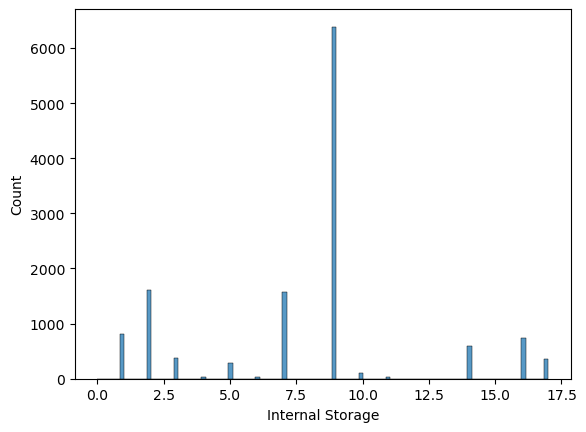

In [228]:
sns.histplot(data['Internal Storage'])
plt.show()

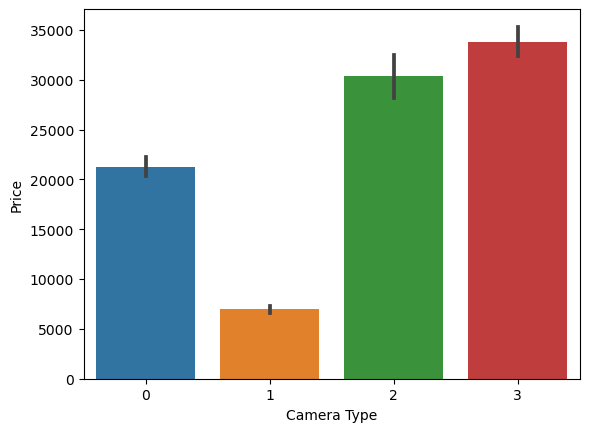

In [229]:
sns.barplot(data=data,x='Camera Type',y='Price')
plt.show()

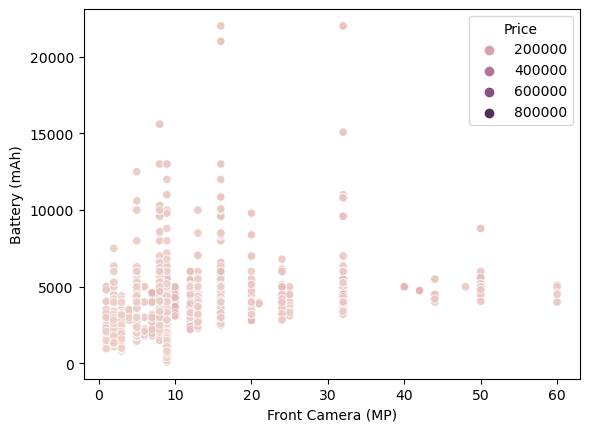

In [230]:
sns.scatterplot(x=data['Front Camera (MP)'],y=data['Battery (mAh)'],hue=data['Price'])
plt.show()

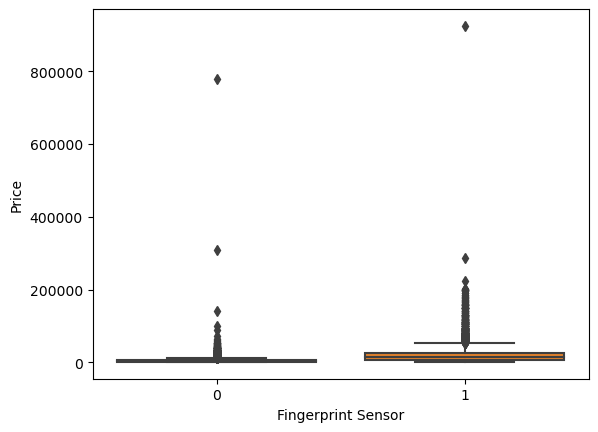

In [231]:
sns.boxplot(data=data,x=data['Fingerprint Sensor'],y='Price')
plt.show()

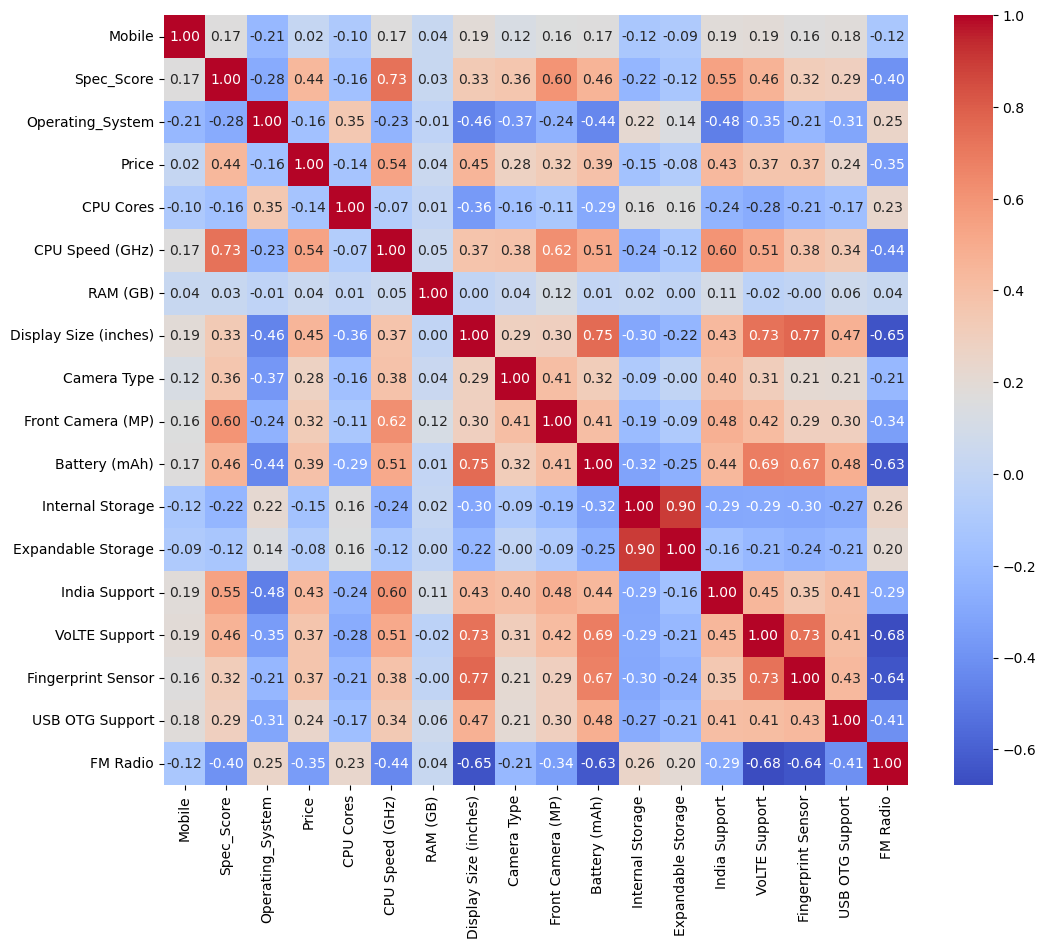

In [232]:
correlation = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=correlation,cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

In [233]:
features = data.drop(columns=['Price','Mobile'])
target = data['Price']

In [234]:
x_train,x_test,Y_train,Y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [235]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [236]:
model = LinearRegression()
model.fit(x_train,Y_train)

LinearRegression()

In [237]:
def apply_model (model):
    model.fit(x_train,Y_train)
    y_pred = model.predict(x_test)
    return y_pred

In [238]:
y_pred = apply_model(model)

In [239]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [240]:
r2_score(Y_test,y_pred)

0.3540363526105609

In [241]:
mean_squared_error(Y_test,y_pred)

399542315.91445386

In [242]:
mean_absolute_error(Y_test,y_pred)

8100.659182698529

In [243]:
root_mean_squared_error(Y_test,y_pred)

19988.55462294495

knn model

In [244]:
from sklearn.neighbors import KNeighborsRegressor
k = 7
knn = KNeighborsRegressor(n_neighbors=k,metric="minkowski",p=2)
y_pred = apply_model(knn)

In [245]:
r2_score(Y_test,y_pred)

0.4409116471709841

In [246]:
from sklearn.model_selection import GridSearchCV

In [247]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

In [248]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(x_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=7), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [249]:
knn = KNeighborsRegressor(n_neighbors=11,metric="manhattan")
y_pred = apply_model(knn)

In [250]:
r2_score(Y_test,y_pred)

0.4723504949846238

In [251]:
mean_squared_error(Y_test,y_pred)

326362491.25929576

In [252]:
mean_absolute_error(Y_test,y_pred)

4729.991978806941

In [253]:
root_mean_squared_error(Y_test,y_pred)

18065.50556334629